# Feature Selection


In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
os.chdir("C:\\Users\\Julian\\Desktop\\DATA\\Proyectos DS\\BreastCancer")

In [3]:
df = pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Data Preparation

In [6]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df= df.replace({"M":1, "B":0})

In [6]:
#Eliminate " Unnamed: 32" & "id"
df= df.drop("Unnamed: 32",axis=1)
df= df.drop("id", axis=1)

# Feature Selection

Feature selection is a process where you automatically select those features in your data that contribute most to the prediction variable or output in which you are interested.
Having irrelevant features in your data can decrease the accuracy of many models, especially linear algorithms like linear and logistic regression.
Three benefits of performing feature selection before modeling your data are:
       
        *Reduces Overfitting:* Less redundant data means less opportunity to make decisions based on noise.
       
        *Improves Accuracy:* Less misleading data means modeling accuracy improves.
       
        *Reduces Training Time:* Less data means that algorithms train faster.


C:\Users\Julian\AppData\Local\Temp\ipykernel_2772\4124065946.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:>

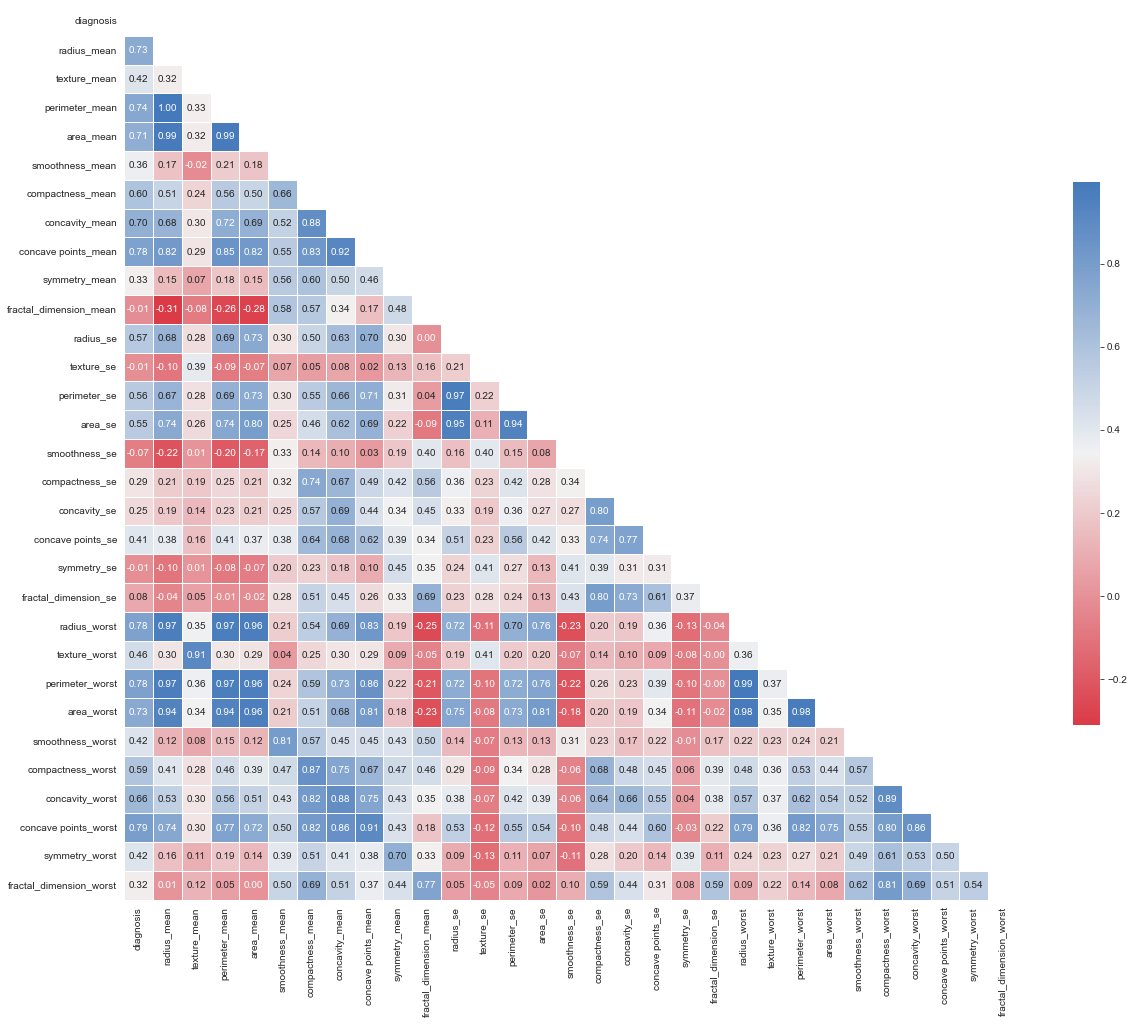

In [17]:
# Correlation matrix

corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.set_style(style = 'white')
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(10, 250, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, 
        annot=True, fmt=".2f", annot_kws={"fontsize": 10}, cbar_kws={"shrink": .5}, ax=ax)

We can see that there are some features lowly correlated with the target variable.


## ANOVA score for feature selection

ANOVA is used when one variable is numeric and one is categorical, such as numerical input variables and a classification target variable in a classification task.

The ANOVA score, used in feature selection, quantifies the relationship between each input feature and the target variable. More specifically, it measures the variation in the target variable that can be explained by the variation in each feature. A higher ANOVA score indicates a stronger relationship between the feature and the target, suggesting that the feature is potentially more informative for predicting the target variable.

In the context of the SelectKBest feature selection method, the ANOVA score is calculated for each feature, and the top-k features with the highest ANOVA scores are selected. This helps to identify the most important features that contribute the most to the prediction task and can improve the model's performance by reducing dimensionality and focusing on the most relevant information.

The scikit-learn machine library provides an implementation of the ANOVA f-test in the f_classif() function. This function can be used in a feature selection strategy, such as selecting the top k most relevant features (largest values) via the SelectKBest class.



In [23]:
# configure to select all features
fs = SelectKBest(score_func=f_classif, k='all')

# learn relationship from training data
fs.fit(X, Y)

# transform train input data
X_fs = fs.transform(X)

concave points_worst: 964.385393
perimeter_worst: 897.944219
concave points_mean: 861.676020
radius_worst: 860.781707
perimeter_mean: 697.235272
area_worst: 661.600206
radius_mean: 646.981021
area_mean: 573.060747
concavity_mean: 533.793126
concavity_worst: 436.691939
compactness_mean: 313.233079
compactness_worst: 304.341063
radius_se: 268.840327
perimeter_se: 253.897392
area_se: 243.651586
texture_worst: 149.596905
smoothness_worst: 122.472880
symmetry_worst: 118.860232
texture_mean: 118.096059
concave points_se: 113.262760
smoothness_mean: 83.651123
symmetry_mean: 69.527444
fractal_dimension_worst: 66.443961
compactness_se: 53.247339
concavity_se: 39.014482
fractal_dimension_se: 3.468275
smoothness_se: 2.557968
fractal_dimension_mean: 0.093459
texture_se: 0.039095
symmetry_se: 0.024117


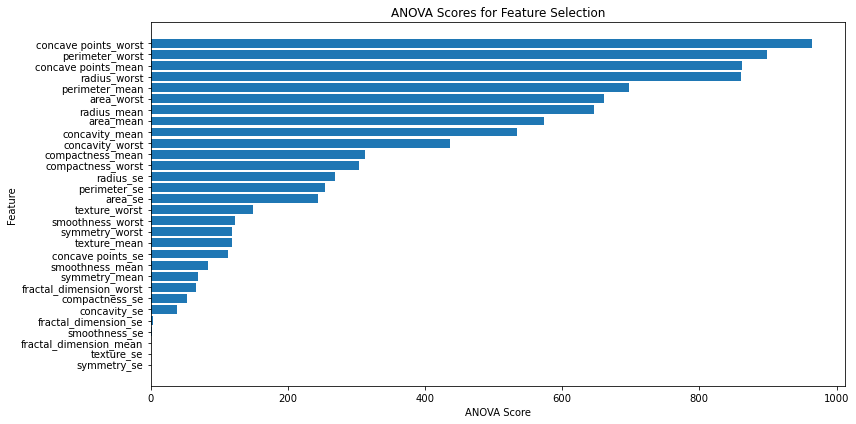

In [49]:
from matplotlib import pyplot

feature_names = X.columns

# Zip the feature names and scores together, then sort them based on scores in descending order
sorted_features = sorted(zip(fs.scores_, feature_names), reverse=True)

# Print the sorted scores and names of the features
for score, name in sorted_features:
    print('%s: %f' % (name, score))
    
# Unpack the sorted scores and names of the features in reverse order (from highest to lowest)
sorted_scores, sorted_names = zip(*reversed(sorted_features))
    
# Figure Size
pyplot.figure(figsize=(12, 6))

# Plot the sorted scores with wider bars and rotated feature names
pyplot.barh(sorted_names, sorted_scores)
pyplot.xlabel('ANOVA Score')
pyplot.ylabel('Feature')
pyplot.title('ANOVA Scores for Feature Selection')
pyplot.tight_layout()  # To avoid overlapping labels
pyplot.show()

In [30]:
values

'Feature 29: 66.443961'

In [20]:
# ANOVA feature selection for numeric input and categorical output
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


#Y = VALOR TARGET --> Si sobrevivieron o no
Y = df.iloc[:,0]

#x = VALOR PREDICTOR, todas las columnas --> Excepto survived
X= df.iloc[:,1:32]


fs = SelectKBest(score_func=f_classif, k=10) #Select the best 10 features
# apply feature selection
X_selected = fs.fit_transform(X, Y)
print(X_selected.shape)

X_selected

(569, 10)


array([[1.799e+01, 1.228e+02, 1.001e+03, ..., 2.019e+03, 7.119e-01,
        2.654e-01],
       [2.057e+01, 1.329e+02, 1.326e+03, ..., 1.956e+03, 2.416e-01,
        1.860e-01],
       [1.969e+01, 1.300e+02, 1.203e+03, ..., 1.709e+03, 4.504e-01,
        2.430e-01],
       ...,
       [1.660e+01, 1.083e+02, 8.581e+02, ..., 1.124e+03, 3.403e-01,
        1.418e-01],
       [2.060e+01, 1.401e+02, 1.265e+03, ..., 1.821e+03, 9.387e-01,
        2.650e-01],
       [7.760e+00, 4.792e+01, 1.810e+02, ..., 2.686e+02, 0.000e+00,
        0.000e+00]])

In [21]:
selected_feature_index = fs.get_support()
selected_feature_name = X.columns[selected_feature_index]

print("Selected feature:", selected_feature_name)

Selected feature: Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')


## Feature importance

Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features.

In [11]:
# Feature Importance with Extra Trees Classifier
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier

# feature extraction
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, Y)
print(model.feature_importances_)

[0.03723519 0.01525124 0.08783086 0.03737188 0.00699047 0.06045428
 0.02205272 0.09810513 0.00495514 0.00455997 0.01121143 0.00240167
 0.01447594 0.02643382 0.00431781 0.00525043 0.00568666 0.0080122
 0.0044798  0.006072   0.02706966 0.03177079 0.10962679 0.12049203
 0.02472805 0.01193549 0.01213841 0.16782479 0.01405823 0.01720714]


In [17]:
model.feature_importances_


0.015251238596285643

#PCA 

In [14]:

# Feature Extraction with PCA
import numpy
from pandas import read_csv
from sklearn.decomposition import PCA

# feature extraction
pca = PCA(n_components=2)
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [0.98204467 0.01617649]
[[ 5.08623202e-03  2.19657026e-03  3.50763298e-02  5.16826469e-01
   4.23694535e-06  4.05260047e-05  8.19399539e-05  4.77807775e-05
   7.07804332e-06 -2.62155251e-06  3.13742507e-04 -6.50984008e-05
   2.23634150e-03  5.57271669e-02 -8.05646029e-07  5.51918197e-06
   8.87094462e-06  3.27915009e-06 -1.24101836e-06 -8.54530832e-08
   7.15473257e-03  3.06736622e-03  4.94576447e-02  8.52063392e-01
   6.42005481e-06  1.01275937e-04  1.68928625e-04  7.36658178e-05
   1.78986262e-05  1.61356159e-06]
 [ 9.28705650e-03 -2.88160658e-03  6.27480827e-02  8.51823720e-01
  -1.48194356e-05 -2.68862249e-06  7.51419574e-05  4.63501038e-05
  -2.52430431e-05 -1.61197148e-05 -5.38692831e-05  3.48370414e-04
   8.19640791e-04  7.51112451e-03  1.49438131e-06  1.27357957e-05
   2.86921009e-05  9.36007477e-06  1.22647432e-05  2.89683790e-07
  -5.68673345e-04 -1.32152605e-02 -1.85961117e-04 -5.19742358e-01
  -7.68565692e-05 -2.56104144e-04 -1.75471479e-04 -3.05051743e-

## Selected features:

In this first analysis, we will use all the features. And then it will be done a reduction in the less important features.
Although we can observe some low correlations with 


## Tenemos que realizar un escalado de variables?? 

In [18]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Class Distribution (M/B)


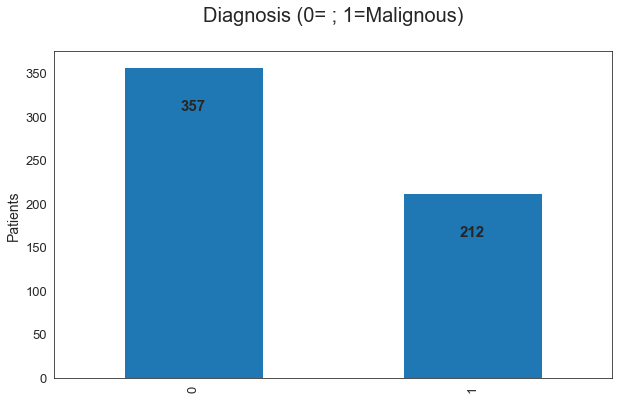

In [19]:

ax = df['diagnosis'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13)
ax.set_title('Diagnosis (0= ; 1=Malignous)', size=20, pad=30)
ax.set_ylabel('Patients', fontsize=14)

for i, value in enumerate( df['diagnosis'].value_counts()):
     ax.text(i - 0, value -50 , str(value), ha='center', fontsize=15, weight='bold')

The data is unbalanced, it will be done some random forest with undersampling and a normal random forest.

# Modeling

In [20]:
from sklearn.model_selection import train_test_split

#Creo mi variable predictiva (X) y mi variable target (Y)

#Y = VALOR TARGET --> Si sobrevivieron o no
Y = df.iloc[:,0]

#x = VALOR PREDICTOR, todas las columnas --> Excepto survived
X= df.iloc[:,1:32]
X.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [21]:
#Target variable: Diagnosis (Y)

Y = df.iloc[:,0]
X= df.iloc[:,1:32]


In [22]:
#TRAIN Y TEST
from sklearn.model_selection import train_test_split
#Split de mis datos 

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.25, random_state=42
)

Matriz de Confusión para Profundidad 1


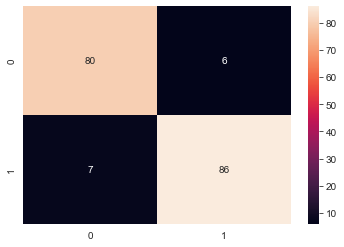

acuracy: 0.9273743016759777
precision: 0.9274594546302268
recall 0.9273743016759777
              precision    recall  f1-score   support

           0       0.92      0.93      0.92        86
           1       0.93      0.92      0.93        93

    accuracy                           0.93       179
   macro avg       0.93      0.93      0.93       179
weighted avg       0.93      0.93      0.93       179

Matriz de Confusión para Profundidad 2


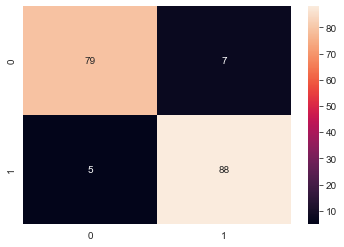

acuracy: 0.9329608938547486
precision: 0.9331191106257263
recall 0.9329608938547486
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        86
           1       0.93      0.95      0.94        93

    accuracy                           0.93       179
   macro avg       0.93      0.93      0.93       179
weighted avg       0.93      0.93      0.93       179

Matriz de Confusión para Profundidad 3


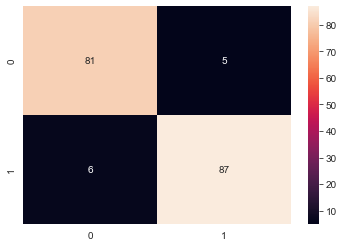

acuracy: 0.9385474860335196
precision: 0.9386291491125945
recall 0.9385474860335196
              precision    recall  f1-score   support

           0       0.93      0.94      0.94        86
           1       0.95      0.94      0.94        93

    accuracy                           0.94       179
   macro avg       0.94      0.94      0.94       179
weighted avg       0.94      0.94      0.94       179

Matriz de Confusión para Profundidad 4


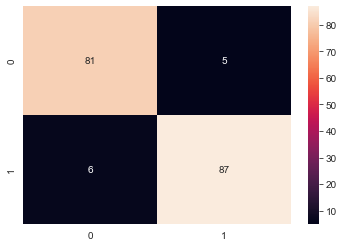

acuracy: 0.9385474860335196
precision: 0.9386291491125945
recall 0.9385474860335196
              precision    recall  f1-score   support

           0       0.93      0.94      0.94        86
           1       0.95      0.94      0.94        93

    accuracy                           0.94       179
   macro avg       0.94      0.94      0.94       179
weighted avg       0.94      0.94      0.94       179

Matriz de Confusión para Profundidad 5


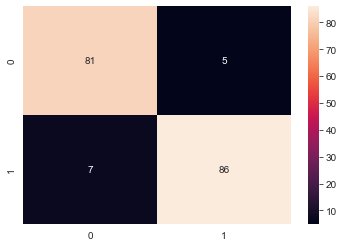

acuracy: 0.9329608938547486
precision: 0.933235758654753
recall 0.9329608938547486
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        86
           1       0.95      0.92      0.93        93

    accuracy                           0.93       179
   macro avg       0.93      0.93      0.93       179
weighted avg       0.93      0.93      0.93       179

Matriz de Confusión para Profundidad 6


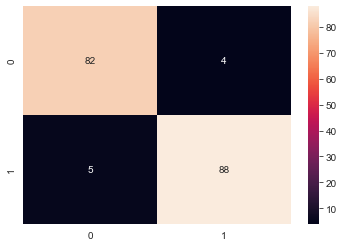

acuracy: 0.9497206703910615
precision: 0.9497988435949624
recall 0.9497206703910615
              precision    recall  f1-score   support

           0       0.94      0.95      0.95        86
           1       0.96      0.95      0.95        93

    accuracy                           0.95       179
   macro avg       0.95      0.95      0.95       179
weighted avg       0.95      0.95      0.95       179

Matriz de Confusión para Profundidad 7


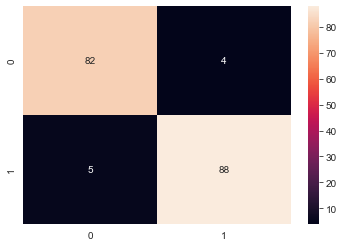

acuracy: 0.9497206703910615
precision: 0.9497988435949624
recall 0.9497206703910615
              precision    recall  f1-score   support

           0       0.94      0.95      0.95        86
           1       0.96      0.95      0.95        93

    accuracy                           0.95       179
   macro avg       0.95      0.95      0.95       179
weighted avg       0.95      0.95      0.95       179

Matriz de Confusión para Profundidad 8


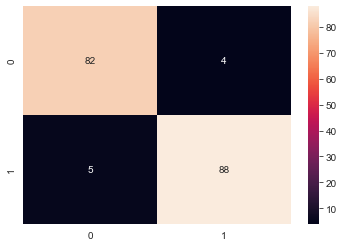

acuracy: 0.9497206703910615
precision: 0.9497988435949624
recall 0.9497206703910615
              precision    recall  f1-score   support

           0       0.94      0.95      0.95        86
           1       0.96      0.95      0.95        93

    accuracy                           0.95       179
   macro avg       0.95      0.95      0.95       179
weighted avg       0.95      0.95      0.95       179

Matriz de Confusión para Profundidad 9


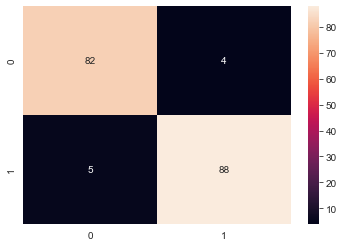

acuracy: 0.9497206703910615
precision: 0.9497988435949624
recall 0.9497206703910615
              precision    recall  f1-score   support

           0       0.94      0.95      0.95        86
           1       0.96      0.95      0.95        93

    accuracy                           0.95       179
   macro avg       0.95      0.95      0.95       179
weighted avg       0.95      0.95      0.95       179



In [36]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

import seaborn as sn
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

from sklearn import metrics

# Lista de valores con máxima profundidad:
max_depth_range = list(range(1, 10))# List to store the average RMSE for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0, splitter="best")
    clf.fit(X_train, y_train)    
    y_pred = clf.predict(X_test)
    matriz = confusion_matrix(y_test, y_pred)
    print('Matriz de Confusión para Profundidad',depth)
    sn.heatmap(matriz, annot=True)
    plt.show()
#    score = clf.score(X_test, Y_test)
#    accuracy.append(score)   
#    print('Profundidad',depth ,'Precisión',score)
    #accuracy
    print("acuracy:", accuracy_score(y_test, y_pred))
    #precision score
    print("precision:", precision_score(y_test, y_pred,average='weighted'))
    #recall score
    print("recall" , metrics.recall_score(y_test,y_pred,average='weighted'))
    print(metrics.classification_report(y_test, y_pred))

Nos quedamos con el de profundidad 6

In [55]:
clf6 = DecisionTreeClassifier(max_depth = 6, 
                             random_state = 1, splitter="best", probability= True)
clf6.fit(X_train, y_train)    
y_pred = clf6.predict_proba(X_test)
#matriz = confusion_matrix(y_test, y_pred)
#print('Matriz de Confusión para Profundidad',6)
#sn.heatmap(matriz, annot=True)
#plt.show()
#    score = clf.score(X_test, Y_test)
#    accuracy.append(score)   
#    print('Profundidad',depth ,'Precisión',score)
    #accuracy
#print("acuracy:", accuracy_score(y_test, y_pred))
    #precision score
#print("precision:", precision_score(y_test, y_pred,average='weighted'))
    #recall score
#print("recall" , metrics.recall_score(y_test,y_pred,average='weighted'))
#print(metrics.classification_report(y_test, y_pred))



TypeError: __init__() got an unexpected keyword argument 'probability'

In [52]:
#Decision treshhold

y_pred_prob = clf6.predict_proba(X_train)
y_pred_prob

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [46]:
#Decision treshhold

y_pred_prob = clf6.predict_proba(X_test)

# Get the predicted probabilities for the malignant class
malignant_probabilities = y_pred_prob[:, 1]

# Convert probabilities to predicted classes using a threshold of 0.5
predicted_classes = (malignant_probabilities > .8).astype(int)

print(malignant_probabilities)
predicted_classes

[0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1.
 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1.
 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0.]


array([0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0])

Matriz de Confusión para Profundidad 6


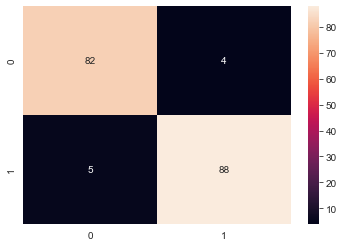

acuracy: 0.9497206703910615
precision: 0.9497988435949624
recall 0.9497206703910615
              precision    recall  f1-score   support

           0       0.94      0.95      0.95        86
           1       0.96      0.95      0.95        93

    accuracy                           0.95       179
   macro avg       0.95      0.95      0.95       179
weighted avg       0.95      0.95      0.95       179



In [47]:
matriz = confusion_matrix(y_test, predicted_classes)
print('Matriz de Confusión para Profundidad',6)
sn.heatmap(matriz, annot=True)
plt.show()
#    score = clf.score(X_test, Y_test)
#    accuracy.append(score)   
#    print('Profundidad',depth ,'Precisión',score)
    #accuracy
print("acuracy:", accuracy_score(y_test, predicted_classes))
    #precision score
print("precision:", precision_score(y_test, predicted_classes,average='weighted'))
    #recall score
print("recall" , metrics.recall_score(y_test,predicted_classes,average='weighted'))
print(metrics.classification_report(y_test, predicted_classes))

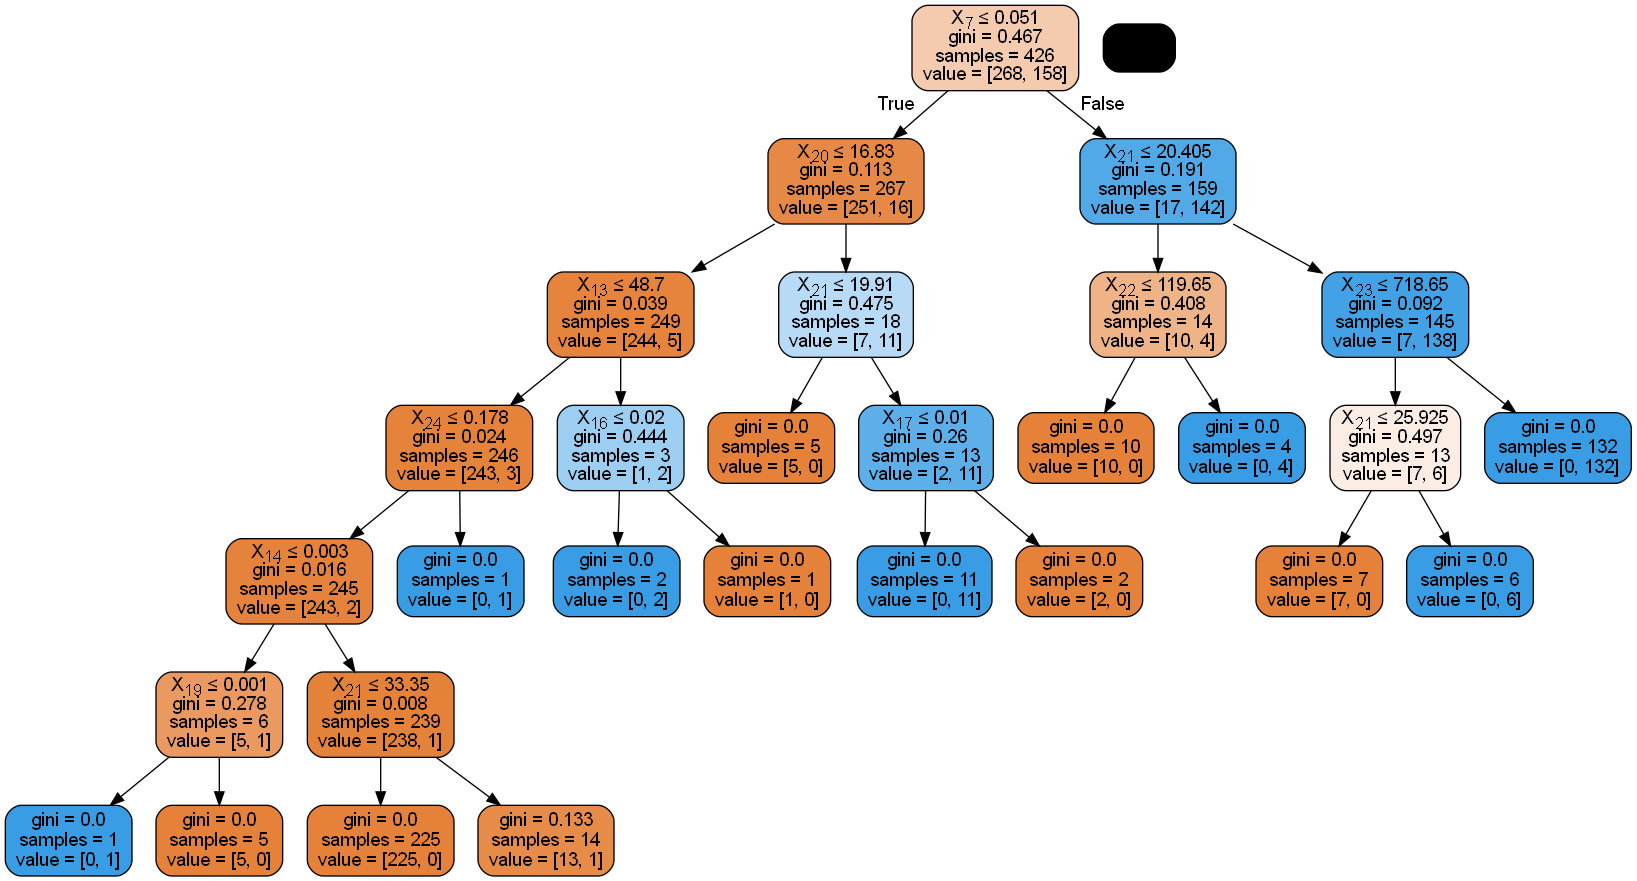

In [27]:
from six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf6, out_file = dot_data,  
                filled = True, rounded = True,
                special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

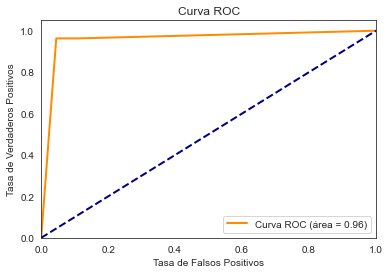

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Obtén las probabilidades de predicción y las etiquetas reales
y_true = y_test  # Etiquetas reales (0 o 1)
y_scores = clf6.predict_proba(X_test)[:, 1]  # Probabilidades de predicción (entre 0 y 1)

# Calcula la curva ROC
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Grafica la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [29]:
# Generate the balanced training dataset 

#Target variable: Diagnosis (Y)

Y = df.iloc[:,0]
X= df.iloc[:,1:32]

In [30]:
## ARBOL DE DECISION CON SMOTE

from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42,sampling_strategy=1)

X_sm, y_sm = sm.fit_resample(X, Y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (569, 30)
Shape of X after SMOTE: (714, 30)

Balance of positive and negative classes (%):


1    50.0
0    50.0
Name: diagnosis, dtype: float64

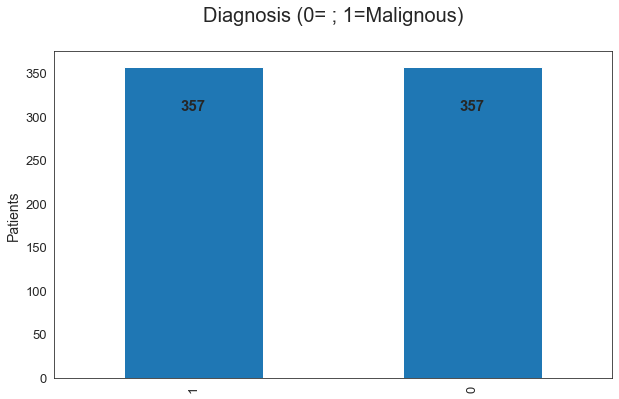

In [31]:
ax = y_sm.value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13)
ax.set_title('Diagnosis (0= ; 1=Malignous)', size=20, pad=30)
ax.set_ylabel('Patients', fontsize=14)

for i, value in enumerate( y_sm.value_counts()):
     ax.text(i - 0, value -50 , str(value), ha='center', fontsize=15, weight='bold')

In [32]:
#TRAIN Y TEST
from sklearn.model_selection import train_test_split
#Split de mis datos 

X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.25, random_state=42
)

Matriz de Confusión para Profundidad 1


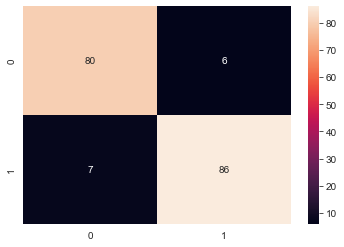

acuracy: 0.9273743016759777
precision: 0.9274594546302268
recall 0.9273743016759777
              precision    recall  f1-score   support

           0       0.92      0.93      0.92        86
           1       0.93      0.92      0.93        93

    accuracy                           0.93       179
   macro avg       0.93      0.93      0.93       179
weighted avg       0.93      0.93      0.93       179

Matriz de Confusión para Profundidad 2


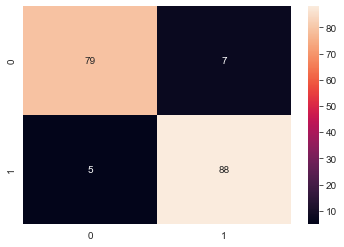

acuracy: 0.9329608938547486
precision: 0.9331191106257263
recall 0.9329608938547486
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        86
           1       0.93      0.95      0.94        93

    accuracy                           0.93       179
   macro avg       0.93      0.93      0.93       179
weighted avg       0.93      0.93      0.93       179

Matriz de Confusión para Profundidad 3


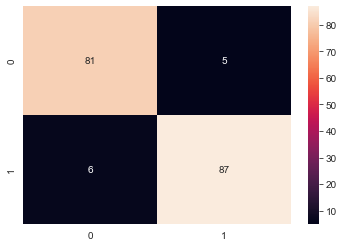

acuracy: 0.9385474860335196
precision: 0.9386291491125945
recall 0.9385474860335196
              precision    recall  f1-score   support

           0       0.93      0.94      0.94        86
           1       0.95      0.94      0.94        93

    accuracy                           0.94       179
   macro avg       0.94      0.94      0.94       179
weighted avg       0.94      0.94      0.94       179

Matriz de Confusión para Profundidad 4


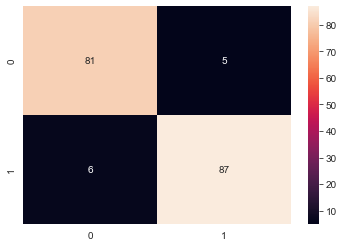

acuracy: 0.9385474860335196
precision: 0.9386291491125945
recall 0.9385474860335196
              precision    recall  f1-score   support

           0       0.93      0.94      0.94        86
           1       0.95      0.94      0.94        93

    accuracy                           0.94       179
   macro avg       0.94      0.94      0.94       179
weighted avg       0.94      0.94      0.94       179

Matriz de Confusión para Profundidad 5


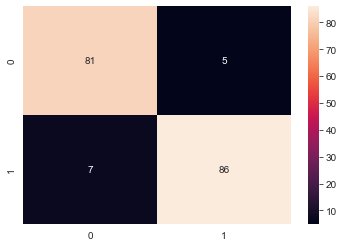

acuracy: 0.9329608938547486
precision: 0.933235758654753
recall 0.9329608938547486
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        86
           1       0.95      0.92      0.93        93

    accuracy                           0.93       179
   macro avg       0.93      0.93      0.93       179
weighted avg       0.93      0.93      0.93       179

Matriz de Confusión para Profundidad 6


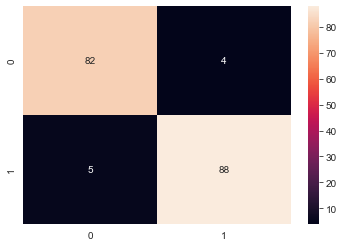

acuracy: 0.9497206703910615
precision: 0.9497988435949624
recall 0.9497206703910615
              precision    recall  f1-score   support

           0       0.94      0.95      0.95        86
           1       0.96      0.95      0.95        93

    accuracy                           0.95       179
   macro avg       0.95      0.95      0.95       179
weighted avg       0.95      0.95      0.95       179



In [33]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

import seaborn as sn
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

from sklearn import metrics

# Lista de valores con máxima profundidad:
max_depth_range = list(range(1, 7))# List to store the average RMSE for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0,)
    clf.fit(X_train, y_train)    
    y_pred = clf.predict(X_test)
    matriz = confusion_matrix(y_test, y_pred)
    print('Matriz de Confusión para Profundidad',depth)
    sn.heatmap(matriz, annot=True)
    plt.show()
#    score = clf.score(X_test, Y_test)
#    accuracy.append(score)   
#    print('Profundidad',depth ,'Precisión',score)
    #accuracy
    print("acuracy:", accuracy_score(y_test, y_pred))
    #precision score
    print("precision:", precision_score(y_test, y_pred,average='weighted'))
    #recall score
    print("recall" , metrics.recall_score(y_test,y_pred,average='weighted'))
    print(metrics.classification_report(y_test, y_pred))